In [2]:
import numpy as np
import faiss
import matplotlib.pyplot as plt
import pandas as pd
from keras.datasets import mnist
import math
from time import perf_counter

***Prepare dataset***

In [3]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [4]:
train_X.shape

(60000, 28, 28)

In [5]:
datasetImages = np.concatenate((train_X, test_X), axis=0)
datasetLabels = np.concatenate((train_y, test_y), axis=0)
datasetImages = datasetImages.reshape(datasetImages.shape[0], datasetImages.shape[1] * datasetImages.shape[2])

In [6]:
datasetImages.shape

(70000, 784)

In [7]:
datasetLabels.shape

(70000,)

***Create faiss***

In [8]:
d = datasetImages.shape[1] # dimension
print(d)

datasetImages = datasetImages.astype('float32') 
query = datasetImages[0:1] # Use the first image as the query vector
print('xb.shape : ', datasetImages.shape, '\nxq.shape : ', query.shape)

784
xb.shape :  (70000, 784) 
xq.shape :  (1, 784)


In [9]:
index = faiss.IndexFlatL2(d)   # take basic index
print('index.is_trained : ', index.is_trained)

index.add(datasetImages) # add vectors to the index
print('index.ntotal : ', index.ntotal)

index.is_trained :  True
index.ntotal :  70000


In [10]:
D = []
I = []
def createTrueLabels(par, D, I):
    k = 100
    totalTime = 0
    for i in range(par) : 
        xq = datasetImages[i:i+1].astype('float32') # Use the first image as the query vector
        time_start = perf_counter()
        x, y = index.search(xq, k)
        time_end = perf_counter()
        totalTime += (time_end - time_start)
        D.append(np.sqrt(x[0]))
        I.append(y[0])
    print(totalTime)
    
createTrueLabels(1000, D, I)

73.59191899999087


***Check if results consistent***

In [43]:
firstD = np.copy(D)
firstI = np.copy(I)

In [44]:
for i in range(len(I)) :
    for j in range(len(I[i])):
        if (I[i][j] != firstI[i][j]):
            print("Not equal")
            print(I[i][j], firstI[i][j])
            print(i, j)
            break
    break

In [45]:
print(I[0][:10])
print(firstI[0][:10])

[    0 32248  8728 18932 30483 63470 65325 24149 42338 52295]
[    0 32248  8728 18932 30483 63470 65325 24149 42338 52295]


In [46]:
print(len(I), len(I[0]))

1000 100


index :  0 
distance :  0.0
index :  32248 
distance :  1561.4724
index :  8728 
distance :  1591.6014
index :  18932 
distance :  1594.7191
index :  30483 
distance :  1596.7095
index :  63470 
distance :  1600.8738
index :  65325 
distance :  1603.479
index :  24149 
distance :  1604.4469
index :  42338 
distance :  1604.8876
index :  52295 
distance :  1605.7092


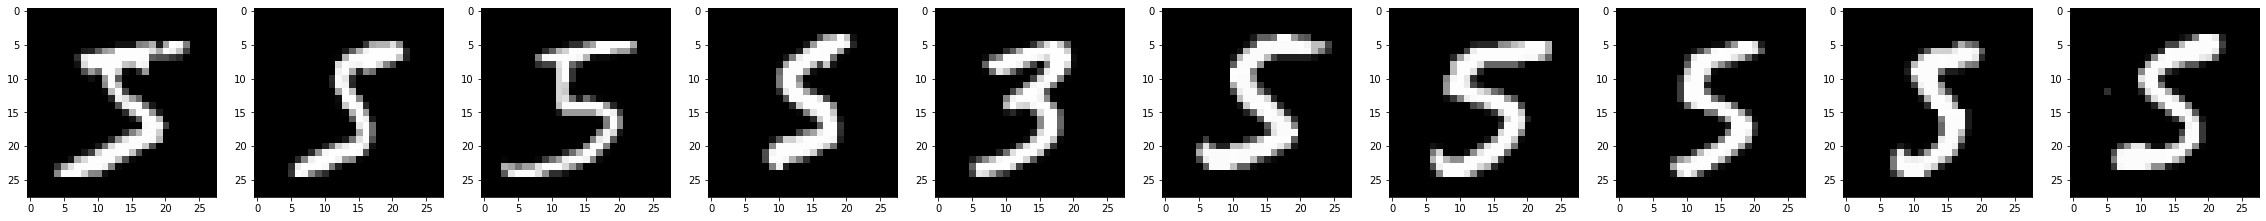

In [47]:
def draw_mnist():
    arr = np.empty([0,784])
    for i in range(10):
        print('index : ', I[0][i], '\ndistance : ', D[0][i])
        arr = np.vstack((arr, datasetImages[I[0][i]]))
    plt.figure(figsize=(len(arr)*4,4))
    for index, (image) in enumerate(zip(arr)):
        plt.subplot(1, len(arr), index + 1)
        plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
draw_mnist()

***ExportDatabase into excel***

In [48]:
indexes = np.array(I)
distances = np.array(D)

In [49]:
indexes.shape

(1000, 100)

In [50]:
distances.shape

(1000, 100)

In [51]:
df = pd.DataFrame(pd.Series(list(indexes)), columns=['Index'])
df["Distances"] = pd.Series(list(distances))

In [52]:
df.head

<bound method NDFrame.head of                                                  Index  \
0    [0, 32248, 8728, 18932, 30483, 63470, 65325, 2...   
1    [1, 639, 51121, 67601, 59187, 31059, 2581, 323...   
2    [2, 64458, 54197, 46128, 4410, 25670, 26652, 2...   
3    [3, 23, 8725, 35507, 51305, 54875, 11249, 5827...   
4    [4, 10208, 36402, 1396, 11190, 39932, 37754, 2...   
..                                                 ...   
995  [995, 10759, 14972, 13867, 39799, 68931, 44091...   
996  [996, 46536, 4072, 65396, 3520, 34686, 45934, ...   
997  [997, 69739, 69791, 13853, 40091, 44313, 47167...   
998  [998, 61797, 24748, 43952, 64714, 31680, 50, 1...   
999  [999, 32205, 43839, 32143, 977, 47037, 30115, ...   

                                             Distances  
0    [0.0, 1561.4724, 1591.6014, 1594.7191, 1596.70...  
1    [0.0, 1020.64734, 1100.5294, 1114.2374, 1125.4...  
2    [0.0, 1358.4657, 1377.6306, 1541.1272, 1553.82...  
3    [0.0, 419.58313, 433.07043, 448.07254, 4

In [53]:
df['Index'][2]

array([    2, 64458, 54197, 46128,  4410, 25670, 26652, 23878, 62338,
       20836, 51202, 37634, 43302, 24296, 45353, 10960, 10832, 60117,
       51288, 61963, 50416, 11408, 14788, 52532, 50846, 51860,  6184,
       56970, 27824, 62498, 27882, 21096, 47750, 48418, 42550, 23090,
       43130, 69267, 16593,  4102, 39386, 11424, 45191,  4616, 62613,
       20932, 63875, 33551, 31106, 60398, 21822, 53426, 40496, 12530,
       52752, 29884, 30604, 31036, 21186, 65782, 38973, 13252, 10870,
       37541, 53192, 25826, 21888, 20040,   682,  4758, 64475, 27370,
       44535, 32862, 25100, 28464, 25706, 40600,  1630,   314,  9392,
       17690, 18617, 19564, 14274, 53768, 49256, 28610,  7166, 41680,
       63332, 14592,  2548, 23174, 53622,  8278, 16850, 12440, 15604,
       62645], dtype=int64)

In [57]:
df['Distances'][2]

array([   0.    , 1358.4657, 1377.6306, 1541.1272, 1553.8256, 1586.1932,
       1597.8661, 1602.7214, 1620.4617, 1627.6028, 1630.0197, 1666.9766,
       1669.4718, 1670.6448, 1676.9648, 1687.7177, 1688.2538, 1709.0553,
       1712.5426, 1720.4764, 1721.9764, 1729.259 , 1729.382 , 1733.4971,
       1733.6461, 1734.3523, 1736.8713, 1737.0409, 1737.1238, 1747.822 ,
       1753.3551, 1753.6003, 1756.1019, 1758.1448, 1760.262 , 1761.5911,
       1767.4241, 1774.7234, 1777.3787, 1779.5201, 1783.9375, 1784.2859,
       1785.3135, 1786.1624, 1787.7556, 1789.6586, 1796.2828, 1797.6512,
       1798.0618, 1802.1626, 1803.5579, 1803.5703, 1811.773 , 1813.3414,
       1816.7427, 1819.875 , 1821.497 , 1826.9083, 1829.4015, 1835.5372,
       1835.7905, 1837.8743, 1841.0709, 1844.8298, 1845.12  , 1845.5254,
       1848.986 , 1849.3625, 1850.4923, 1850.8439, 1851.5885, 1855.7559,
       1857.1411, 1858.654 , 1859.0067, 1859.547 , 1859.5515, 1861.2208,
       1864.2706, 1864.9268, 1865.3064, 1865.8462, 

In [54]:
df.to_csv('mnistTrueLabels.csv', index=False) 

In [55]:
df.to_excel("mnistTrueLabels.xlsx",
             sheet_name='Sheet_name_1')